# Exercise: Predict Diabetes with a Linear Regression Model
In this exercise, I'll predict a patient's diabetes desease progression from a health indicator such as body mass index (BMI).

My tasks as follow:

- Get an overview of the dataset
- Plot a histogram of the data
- Plot the correlation matrix
- Split into training and test data
- Train a linear regression model
- Evaluate the model and plot the results

In [74]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# Load dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [76]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [78]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

# Plotting a histogram in matplotlib to get an overview of the data.

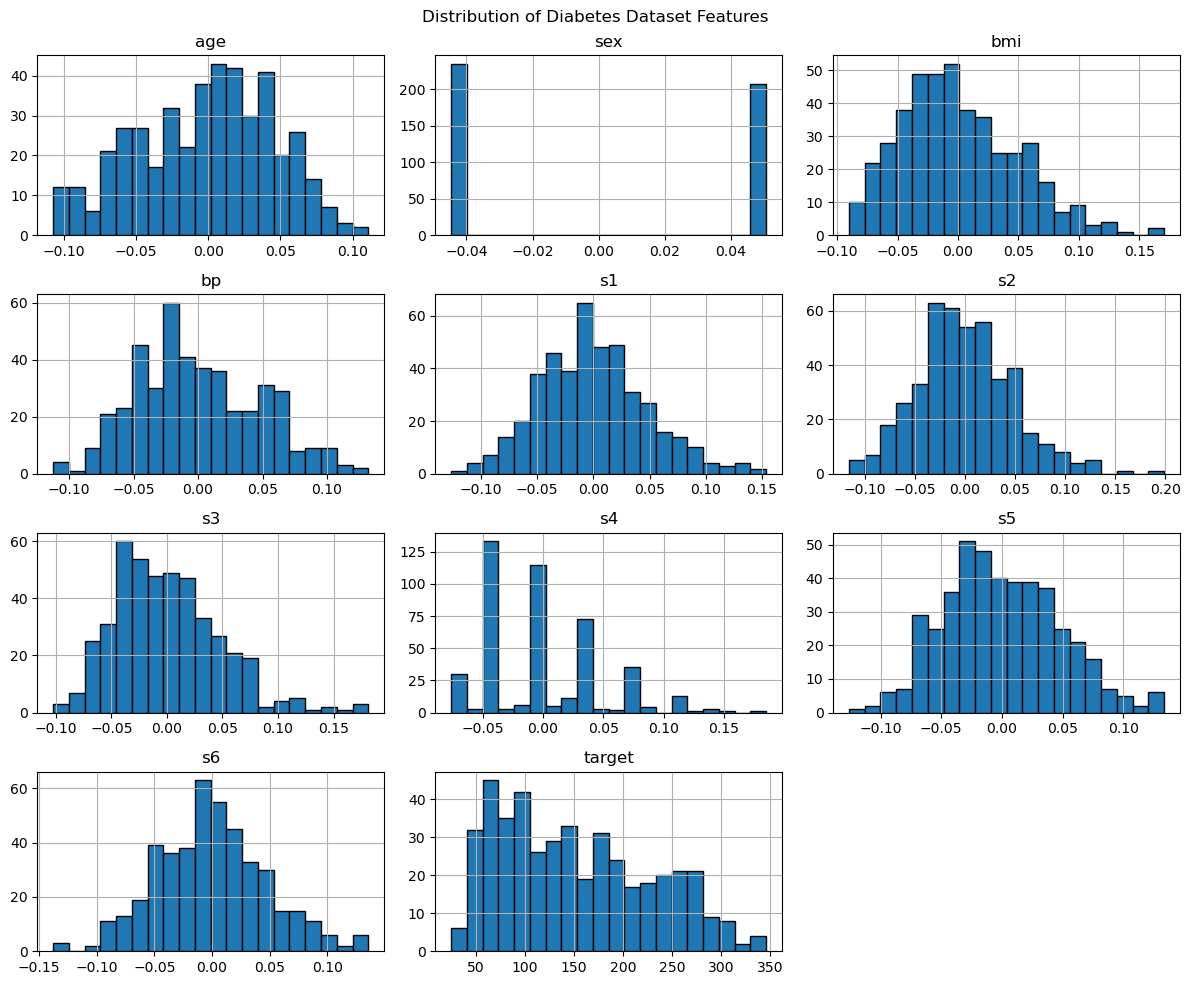

In [79]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Diabetes Dataset Features')
plt.tight_layout()
plt.show()

# Calculating the linear correlation matrix of the features and the target and plotting the results.

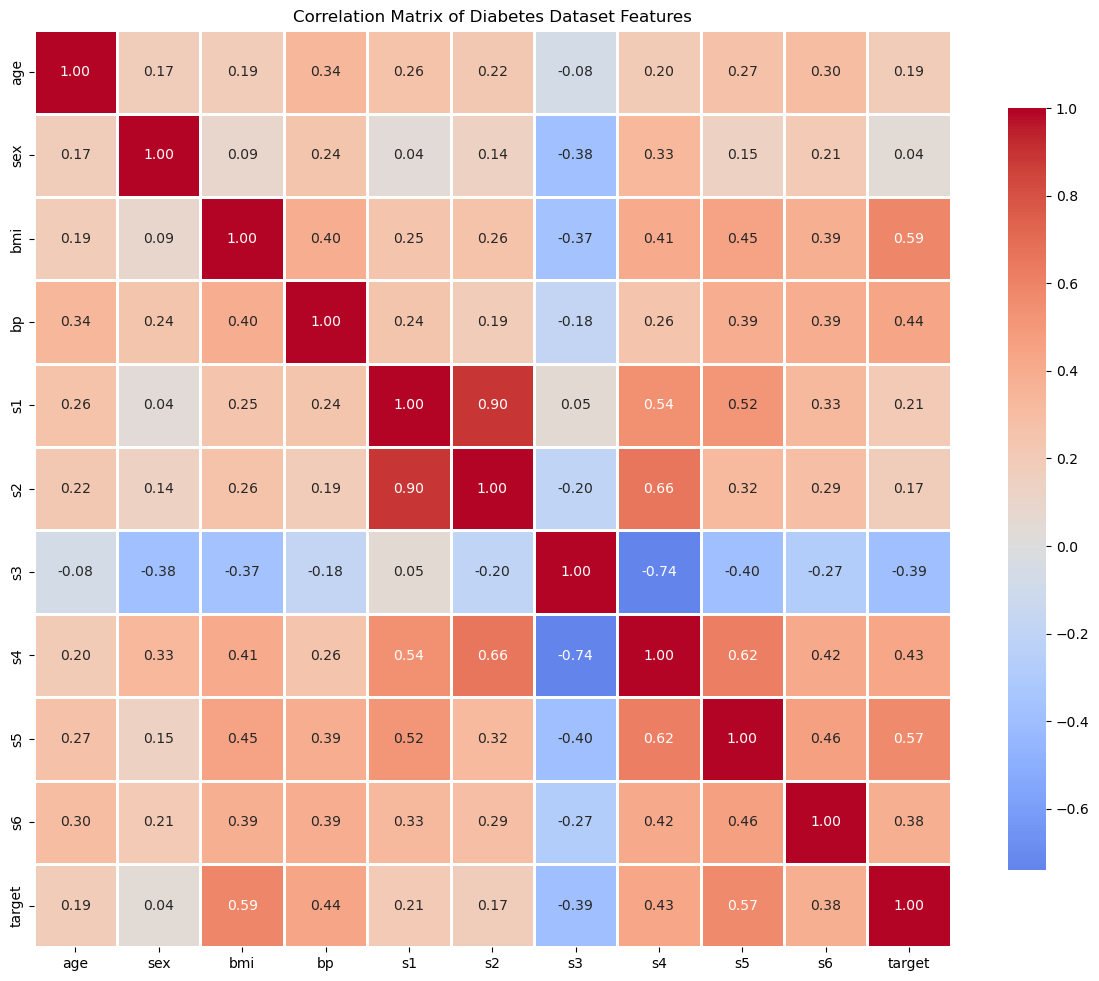


Feature Correlations with Target:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [80]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.tight_layout()
plt.show()

# Show correlations with target
print("\nFeature Correlations with Target:")
print(correlation_matrix['target'].sort_values(ascending=False))

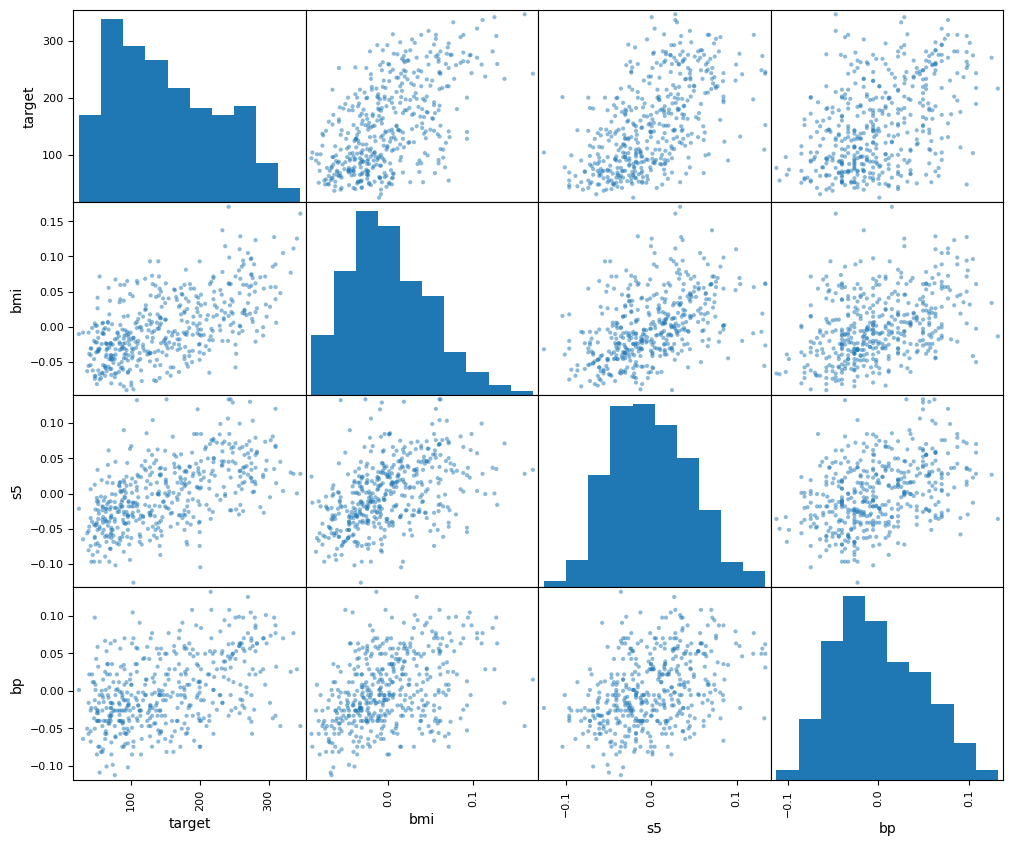

In [81]:
from pandas.plotting import scatter_matrix

features = ['target', 'bmi', 's5', 'bp']

scatter_matrix(df[features], figsize=(12, 10))
plt.show()

# Training and Evaluation

In [82]:
# Split the data into features and labels
X = df.drop('target', axis=1)
y = df['target']

In [83]:
# Spliting my data with the ratio of: Train: 0.8 / Test: 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Making predictions on the training and test set
linear_predictions_train = linear_model.predict(X_train)
linear_predictions_test = linear_model.predict(X_test)
print(linear_predictions_test[:10].round(0))

[238. 249. 164. 120. 187. 259. 114. 188. 149. 236.]


In [86]:
# compare the predictions with the actual values
print(y_test[:10].values)

[321. 215. 127.  64. 175. 275. 179. 232. 142.  99.]


In [87]:
# Calculating the relative error of these predictions
relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in per cent: ", relative_errors[:10].values)

Relative errors in per cent:  [ 25.71043767  15.780521    29.17899669  87.98085665   7.0999053
   5.80092011  36.55984088  18.93205686   5.27832202 138.39149745]


In [88]:
# Calculating the Root Mean Squared error on the training and test set
from sklearn.metrics import root_mean_squared_error
rsme_train = root_mean_squared_error(y_train, linear_predictions_train)
print(rsme_train)
rsme_test = root_mean_squared_error(y_test, linear_predictions_test)
print(rsme_test)

52.29484581749661
58.517171277315626


In [89]:
# Train a simple linear regression model with only one feature for comparison
X_train_bmi = X_train[['bmi']]
X_test_bmi = X_test[['bmi']]
simple_linear_model = LinearRegression()
simple_linear_model.fit(X_train_bmi, y_train)

LinearRegression()

In [90]:
# Make predictions on the training and test set
simple_predictions_train = simple_linear_model.predict(X_train_bmi)
simple_predictions_test = simple_linear_model.predict(X_test_bmi)

In [91]:
# Calculating the Root Mean Squared error on the training and test set
simple_rsme_train = root_mean_squared_error(y_train, simple_predictions_train)
print(simple_rsme_train)
simple_rsme_test = root_mean_squared_error(y_test, simple_predictions_test)
print(simple_rsme_test)

61.86936801367363
64.42577271038343


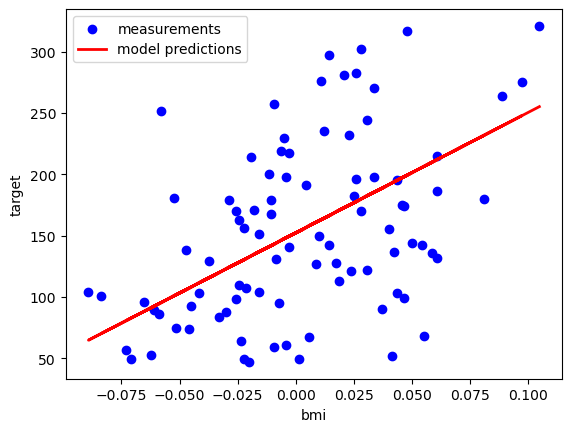

In [92]:
# Plot the simple linear regression model
plt.scatter(X_test_bmi, y_test, color='blue', label='measurements')
plt.plot(X_test_bmi, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel('bmi')
plt.ylabel('target')
plt.legend(loc='upper left')
plt.show()

# Conclusion
***

Higher RMSE (~62 training, ~64 test) confirms BMI's importance but also shows that, only this feature is insufficient compared to all features combined.